# Description

This notebook is used to find currencies that are exactly the same in our universe.

# Imports

In [1]:
import logging
import os

import seaborn as sns

import core.config.config_ as cconconf
import core.plotting as coplotti
import helpers.dbg as hdbg
import helpers.env as henv
import helpers.printing as hprint
import helpers.s3 as hs3
import im_v2.common.universe.universe as imvcounun
import research_amp.cc.statistics as rccstat

/app/core/explore.py:39: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tauton


In [2]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-0705232b-e5a3-4efd-abcf-c31c8b76c3d4.json'
>>ENV<<: is_inside_container=True: code_version=None, container_version=cmamp-1.0.0, is_inside_docker=True, is_inside_ci=False, CI_defined=True, CI=''
>>ENV<<: AM_AWS_PROFILE=True AM_ECR_BASE_PATH=True AM_S3_BUCKET=True AM_TELEGRAM_TOKEN=True AWS_ACCESS_KEY_ID=False AWS_DEFAULT_REGION=False AWS_SECRET_ACCESS_KEY=False GH_ACTION_ACCESS_TOKEN=True
-----------------------------------------------------------------------------
This code is not in sync with the container:
code_version='None' != container_version='cmamp-1.0.0'
-----------------------------------------------------------------------------
You need to:
- merge origin/master into your branch with `invoke git_merge_master`
- pull the latest container with `invoke docker_pull`
# Git
    branch_name='CmTask336_Refactor_research_lib_and_join_notebooks'
    hash='bd52687b'
    # L

# Config

In [3]:
def get_config() -> cconconf.Config:
    """
    Get config that controls parameters.
    """
    config = cconconf.Config()
    # Load parameters.
    config.add_subconfig("load")
    config["load"]["aws_profile"] = "am"
    config["load"]["data_dir"] = os.path.join(hs3.get_path(), "data")
    # Data parameters.
    config.add_subconfig("data")
    config["data"]["universe_version"] = "v0_3"
    config["data"]["data_type"] = "OHLCV"
    config["data"]["vendor"] = "CCXT"
    config["data"]["price_column"] = "close"
    return config


config = get_config()
print(config)

load:
  aws_profile: am
  data_dir: s3://alphamatic-data/data
data:
  universe_version: v0_3
  data_type: OHLCV
  vendor: CCXT
  price_column: close


# Get price data for a given universe

In [4]:
vendor_universe = imvcounun.get_vendor_universe_as_tuples(
    config["data"]["universe_version"], config["data"]["vendor"]
)
vendor_universe

[ExchangeCurrencyTuple(exchange_id='binance', currency_pair='ADA/USDT'),
 ExchangeCurrencyTuple(exchange_id='binance', currency_pair='AVAX/USDT'),
 ExchangeCurrencyTuple(exchange_id='binance', currency_pair='BNB/USDT'),
 ExchangeCurrencyTuple(exchange_id='binance', currency_pair='BTC/USDT'),
 ExchangeCurrencyTuple(exchange_id='binance', currency_pair='DOGE/USDT'),
 ExchangeCurrencyTuple(exchange_id='binance', currency_pair='EOS/USDT'),
 ExchangeCurrencyTuple(exchange_id='binance', currency_pair='ETH/USDT'),
 ExchangeCurrencyTuple(exchange_id='binance', currency_pair='LINK/USDT'),
 ExchangeCurrencyTuple(exchange_id='binance', currency_pair='SOL/USDT'),
 ExchangeCurrencyTuple(exchange_id='ftx', currency_pair='BNB/USDT'),
 ExchangeCurrencyTuple(exchange_id='ftx', currency_pair='BTC/USDT'),
 ExchangeCurrencyTuple(exchange_id='ftx', currency_pair='DOGE/USDT'),
 ExchangeCurrencyTuple(exchange_id='ftx', currency_pair='ETH/USDT'),
 ExchangeCurrencyTuple(exchange_id='ftx', currency_pair='LINK/U

In [5]:
df_price = rccstat.get_universe_price_data(vendor_universe, config)
df_price.head(3)

Reading CCXT data for exchange id='binance', currencies='ADA/USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/ADA_USDT.csv.gz'...
Processing CCXT data for exchange id='binance', currencies='ADA/USDT'...
Index length increased by 4520 = 1622000 - 1617480
Reading CCXT data for exchange id='binance', currencies='AVAX/USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/AVAX_USDT.csv.gz'...
Processing CCXT data for exchange id='binance', currencies='AVAX/USDT'...
Index length increased by 1224 = 517498 - 516274
Reading CCXT data for exchange id='binance', currencies='BNB/USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/BNB_USDT.csv.gz'...
Processing CCXT data for exchange id='binance', currencies='BNB/USDT'...
Index length increased by 4520 = 1622295 - 1617775
Reading CCXT data for exchange id='binance', currencies='BTC/USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/BTC_USDT.csv.gz'...
Processing CCXT data for exchange id='binan

Index length increased by 94496 = 1619786 - 1525290
Reading CCXT data for exchange id='kucoin', currencies='DOGE/USDT' from file='s3://alphamatic-data/data/ccxt/20210924/kucoin/DOGE_USDT.csv.gz'...
Processing CCXT data for exchange id='kucoin', currencies='DOGE/USDT'...
Index length=314817 has not changed
Reading CCXT data for exchange id='kucoin', currencies='EOS/USDT' from file='s3://alphamatic-data/data/ccxt/20210924/kucoin/EOS_USDT.csv.gz'...
Processing CCXT data for exchange id='kucoin', currencies='EOS/USDT'...
Index length increased by 232290 = 1621431 - 1389141
Reading CCXT data for exchange id='kucoin', currencies='ETH/USDT' from file='s3://alphamatic-data/data/ccxt/20210924/kucoin/ETH_USDT.csv.gz'...
Processing CCXT data for exchange id='kucoin', currencies='ETH/USDT'...
Index length increased by 117548 = 1619960 - 1502412
Reading CCXT data for exchange id='kucoin', currencies='FIL/USDT' from file='s3://alphamatic-data/data/ccxt/20210924/kucoin/FIL_USDT.csv.gz'...
Processing 

,binance ADA/USDT,binance AVAX/USDT,binance BNB/USDT,binance BTC/USDT,binance DOGE/USDT,binance EOS/USDT,binance ETH/USDT,binance LINK/USDT,binance SOL/USDT,ftx BNB/USDT,ftx BTC/USDT,ftx DOGE/USDT,ftx ETH/USDT,ftx LINK/USDT,ftx SOL/USDT,ftx XRP/USDT,gateio ADA/USDT,gateio AVAX/USDT,gateio BNB/USDT,gateio BTC/USDT,gateio DOGE/USDT,gateio EOS/USDT,gateio ETH/USDT,gateio FIL/USDT,gateio LINK/USDT,gateio SOL/USDT,gateio XRP/USDT,kucoin ADA/USDT,kucoin AVAX/USDT,kucoin BNB/USDT,kucoin BTC/USDT,kucoin DOGE/USDT,kucoin EOS/USDT,kucoin ETH/USDT,kucoin FIL/USDT,kucoin LINK/USDT,kucoin SOL/USDT,kucoin XRP/USDT
2018-08-16 20:00:00-04:00,0.09479,NaN,9.7778,6311.64,NaN,4.5131,286.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6325.770051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-16 20:01:00-04:00,0.09473,NaN,9.7608,6302.81,NaN,4.5074,286.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.204997,NaN,NaN,286.712987,NaN,NaN,NaN,NaN
2018-08-16 20:02:00-04:00,0.09456,NaN,9.7384,6297.26,NaN,4.5010,285.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6297.333413,NaN,NaN,285.400197,NaN,NaN,NaN,NaN


In [6]:
df_price.describe().round(2)

,binance ADA/USDT,binance AVAX/USDT,binance BNB/USDT,binance BTC/USDT,binance DOGE/USDT,binance EOS/USDT,binance ETH/USDT,binance LINK/USDT,binance SOL/USDT,ftx BNB/USDT,ftx BTC/USDT,ftx DOGE/USDT,ftx ETH/USDT,ftx LINK/USDT,ftx SOL/USDT,ftx XRP/USDT,gateio ADA/USDT,gateio AVAX/USDT,gateio BNB/USDT,gateio BTC/USDT,gateio DOGE/USDT,gateio EOS/USDT,gateio ETH/USDT,gateio FIL/USDT,gateio LINK/USDT,gateio SOL/USDT,gateio XRP/USDT,kucoin ADA/USDT,kucoin AVAX/USDT,kucoin BNB/USDT,kucoin BTC/USDT,kucoin DOGE/USDT,kucoin EOS/USDT,kucoin ETH/USDT,kucoin FIL/USDT,kucoin LINK/USDT,kucoin SOL/USDT,kucoin XRP/USDT
count,1617480.00,516274.00,1617775.00,1615122.00,1154731.00,1617924.00,1615369.00,1398630.00,574916.00,763247.00,780671.00,362575.00,780713.00,747035.00,607399.00,618149.00,129365.00,129134.00,129250.00,129606.00,129422.00,129192.00,129606.00,129480.00,129307.00,129595.00,129537.00,1158284.00,280129.00,1180057.00,1525290.00,314817.00,1389141.00,1502412.00,482205.00,563664.00,60509.00,1357381.00
mean,0.36,18.46,88.08,16838.60,0.07,3.91,701.20,10.48,23.68,172.17,27807.60,0.21,1297.83,18.25,24.89,0.62,1.85,26.20,369.49,41020.73,0.25,4.45,2748.26,65.37,22.99,68.41,0.88,0.48,25.48,115.76,17577.17,0.23,3.87,742.78,64.36,21.83,96.05,0.42
std,0.62,14.26,149.35,16067.01,0.12,1.52,934.83,11.28,32.94,188.43,17832.96,0.14,1119.93,10.75,36.00,0.39,0.64,18.39,72.03,6741.16,0.04,0.71,640.95,14.89,5.13,51.64,0.26,0.69,12.21,166.45,16271.93,0.14,1.53,958.17,43.94,9.47,50.82,0.32
min,0.02,2.75,4.12,3157.67,0.00,1.39,82.03,0.35,1.06,13.45,5860.50,0.01,123.83,3.34,1.07,0.17,1.02,9.34,251.82,29325.12,0.16,3.16,1718.22,40.13,13.40,22.19,0.52,0.02,9.34,6.48,3160.00,0.04,1.39,82.03,10.00,7.31,33.41,0.11
25%,0.05,4.19,15.09,6755.01,0.00,2.69,171.64,2.11,2.63,22.45,10538.50,0.06,346.96,10.35,2.46,0.27,1.31,11.74,306.40,33908.61,0.21,3.86,2131.36,53.78,18.31,31.37,0.64,0.05,13.72,17.50,7250.80,0.06,2.70,175.04,29.95,12.99,44.44,0.24
50%,0.08,13.55,21.46,9440.79,0.00,3.55,231.35,4.10,13.17,37.45,23824.00,0.22,647.65,15.80,11.99,0.53,1.43,14.65,341.44,42247.00,0.24,4.29,2836.78,62.33,23.90,37.44,0.76,0.10,25.66,27.34,9668.90,0.24,3.51,239.92,51.43,21.32,76.43,0.30
75%,0.15,29.53,33.86,19077.00,0.05,4.88,588.93,16.55,33.90,320.78,44994.00,0.30,2145.50,26.82,34.06,0.87,2.45,44.28,421.36,47166.80,0.28,5.02,3268.02,76.16,27.21,93.76,1.12,1.06,33.56,225.85,23669.25,0.31,4.60,704.00,77.31,28.26,141.71,0.46
max,3.10,65.55,691.06,64800.00,0.74,14.84,4363.95,52.95,215.14,691.22,64805.00,0.74,4365.00,52.91,215.00,1.97,3.10,76.06,518.71,52868.97,0.35,6.39,4020.17,119.97,36.31,214.90,1.41,3.10,64.78,691.24,64794.70,0.74,14.84,4366.28,237.51,52.95,215.04,1.96


In [7]:
df_price.head()

,binance ADA/USDT,binance AVAX/USDT,binance BNB/USDT,binance BTC/USDT,binance DOGE/USDT,binance EOS/USDT,binance ETH/USDT,binance LINK/USDT,binance SOL/USDT,ftx BNB/USDT,ftx BTC/USDT,ftx DOGE/USDT,ftx ETH/USDT,ftx LINK/USDT,ftx SOL/USDT,ftx XRP/USDT,gateio ADA/USDT,gateio AVAX/USDT,gateio BNB/USDT,gateio BTC/USDT,gateio DOGE/USDT,gateio EOS/USDT,gateio ETH/USDT,gateio FIL/USDT,gateio LINK/USDT,gateio SOL/USDT,gateio XRP/USDT,kucoin ADA/USDT,kucoin AVAX/USDT,kucoin BNB/USDT,kucoin BTC/USDT,kucoin DOGE/USDT,kucoin EOS/USDT,kucoin ETH/USDT,kucoin FIL/USDT,kucoin LINK/USDT,kucoin SOL/USDT,kucoin XRP/USDT
2018-08-16 20:00:00-04:00,0.09479,NaN,9.7778,6311.64,NaN,4.5131,286.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6325.770051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-16 20:01:00-04:00,0.09473,NaN,9.7608,6302.81,NaN,4.5074,286.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.204997,NaN,NaN,286.712987,NaN,NaN,NaN,NaN
2018-08-16 20:02:00-04:00,0.09456,NaN,9.7384,6297.26,NaN,4.5010,285.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6297.333413,NaN,NaN,285.400197,NaN,NaN,NaN,NaN
2018-08-16 20:03:00-04:00,0.09417,NaN,9.7220,6294.52,NaN,4.4974,285.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6303.552635,NaN,NaN,285.400193,NaN,NaN,NaN,NaN
2018-08-16 20:04:00-04:00,0.09421,NaN,9.7220,6296.10,NaN,4.4974,285.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285.884638,NaN,NaN,NaN,NaN


# Find same currencies

In [8]:
df_returns = df_price.pct_change()
df_returns.head(3)

,binance ADA/USDT,binance AVAX/USDT,binance BNB/USDT,binance BTC/USDT,binance DOGE/USDT,binance EOS/USDT,binance ETH/USDT,binance LINK/USDT,binance SOL/USDT,ftx BNB/USDT,ftx BTC/USDT,ftx DOGE/USDT,ftx ETH/USDT,ftx LINK/USDT,ftx SOL/USDT,ftx XRP/USDT,gateio ADA/USDT,gateio AVAX/USDT,gateio BNB/USDT,gateio BTC/USDT,gateio DOGE/USDT,gateio EOS/USDT,gateio ETH/USDT,gateio FIL/USDT,gateio LINK/USDT,gateio SOL/USDT,gateio XRP/USDT,kucoin ADA/USDT,kucoin AVAX/USDT,kucoin BNB/USDT,kucoin BTC/USDT,kucoin DOGE/USDT,kucoin EOS/USDT,kucoin ETH/USDT,kucoin FIL/USDT,kucoin LINK/USDT,kucoin SOL/USDT,kucoin XRP/USDT
2018-08-16 20:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-16 20:01:00-04:00,-0.000633,NaN,-0.001739,-0.001399,NaN,-0.001263,-0.000628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-16 20:02:00-04:00,-0.001795,NaN,-0.002295,-0.000881,NaN,-0.001420,-0.002828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001882,NaN,NaN,-0.004579,NaN,NaN,NaN,NaN


The corr_df.shape[0]='38' > 20


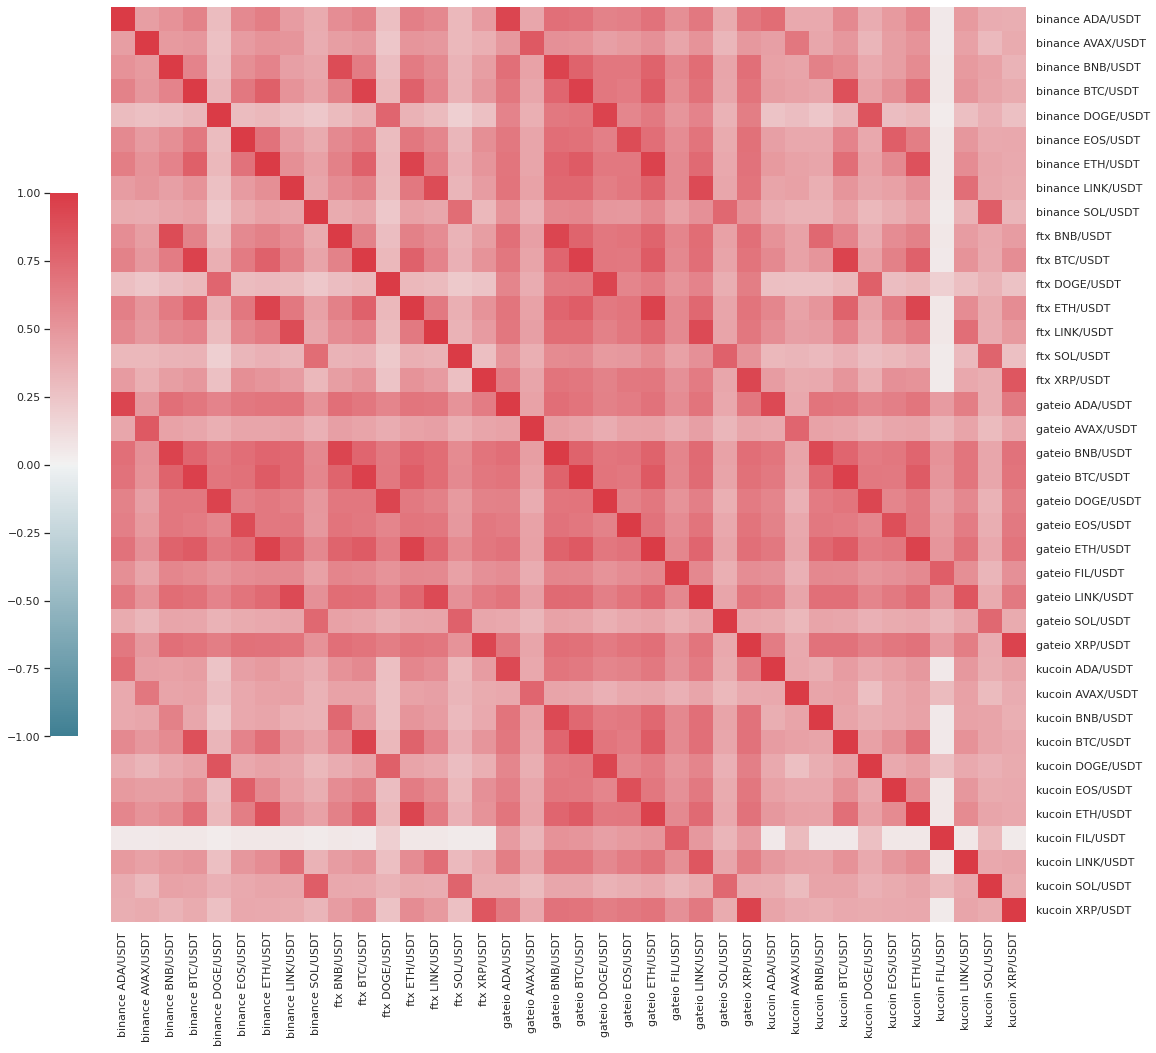

In [9]:
corr_matrix = df_returns.corr()
_ = coplotti.plot_heatmap(corr_matrix)

`cluster_and_select()` distinguishes clusters but some very highly correlated stable coins are clustered together so it seems like that we cannot rely on dendrodram and clustering alone.

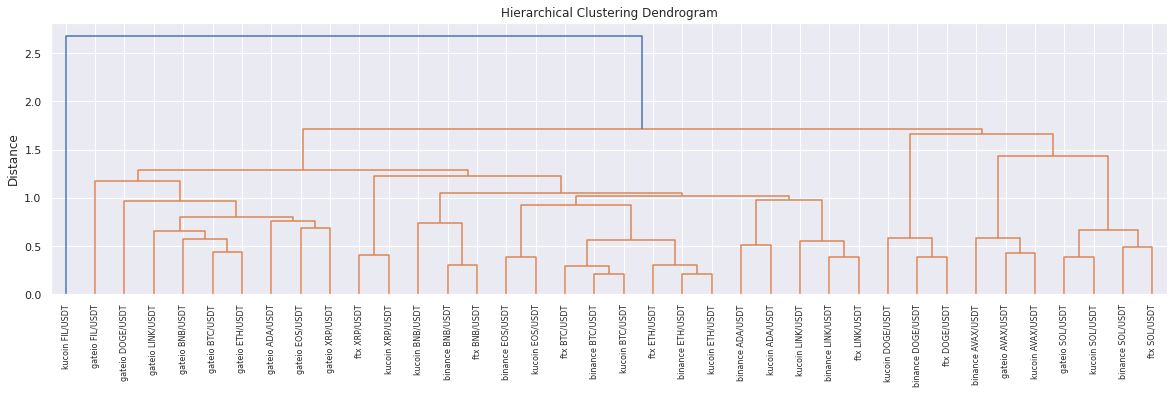

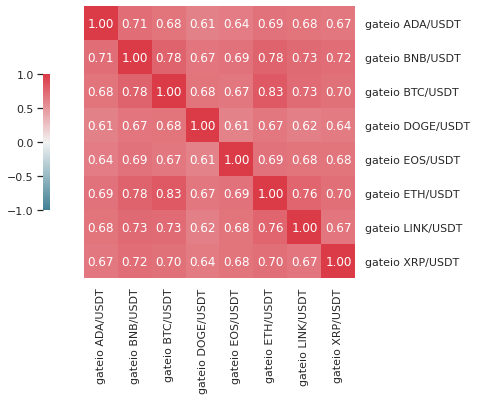

Current cluster is 1
Original series in cluster is ['gateio ADA/USDT', 'gateio XRP/USDT', 'gateio ETH/USDT', 'gateio EOS/USDT', 'gateio LINK/USDT', 'gateio BNB/USDT', 'gateio BTC/USDT', 'gateio DOGE/USDT']
Series to keep in cluster is ['gateio ADA/USDT', 'gateio BNB/USDT', 'gateio BTC/USDT', 'gateio DOGE/USDT', 'gateio EOS/USDT', 'gateio LINK/USDT', 'gateio XRP/USDT']


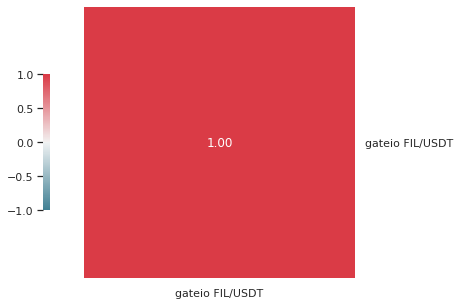

Current cluster is 2
Original series in cluster is ['gateio FIL/USDT']
Series to keep in cluster is ['gateio FIL/USDT']


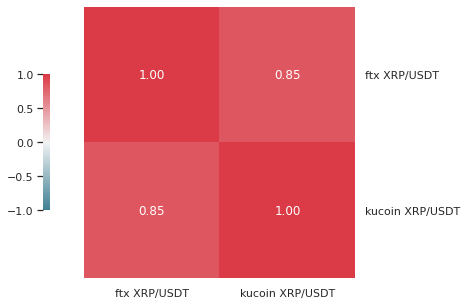

Current cluster is 3
Original series in cluster is ['ftx XRP/USDT', 'kucoin XRP/USDT']
Series to keep in cluster is ['ftx XRP/USDT']


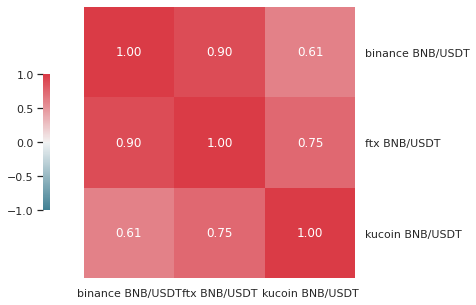

Current cluster is 4
Original series in cluster is ['binance BNB/USDT', 'kucoin BNB/USDT', 'ftx BNB/USDT']
Series to keep in cluster is ['binance BNB/USDT', 'kucoin BNB/USDT']


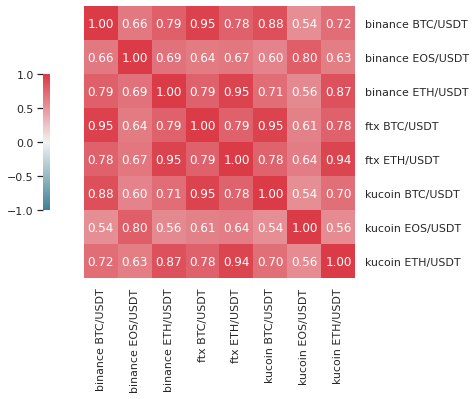

Current cluster is 5
Original series in cluster is ['binance EOS/USDT', 'binance BTC/USDT', 'kucoin BTC/USDT', 'kucoin ETH/USDT', 'binance ETH/USDT', 'ftx BTC/USDT', 'kucoin EOS/USDT', 'ftx ETH/USDT']
Series to keep in cluster is ['binance BTC/USDT', 'binance EOS/USDT', 'binance ETH/USDT', 'kucoin EOS/USDT']


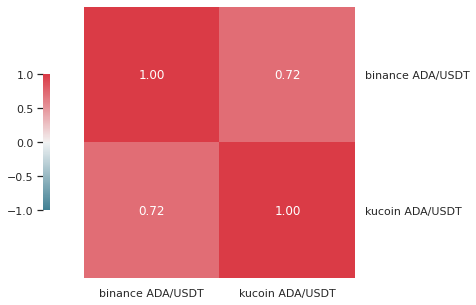

Current cluster is 6
Original series in cluster is ['binance ADA/USDT', 'kucoin ADA/USDT']
Series to keep in cluster is ['binance ADA/USDT', 'kucoin ADA/USDT']


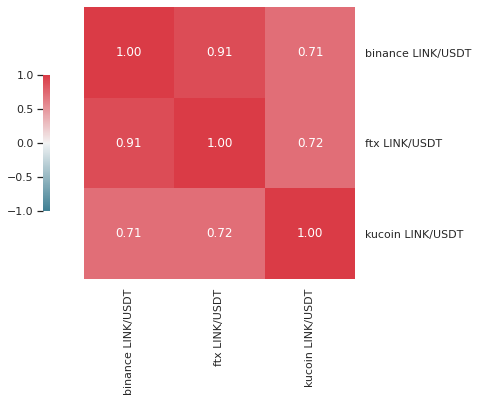

Current cluster is 7
Original series in cluster is ['ftx LINK/USDT', 'kucoin LINK/USDT', 'binance LINK/USDT']
Series to keep in cluster is ['binance LINK/USDT', 'kucoin LINK/USDT']


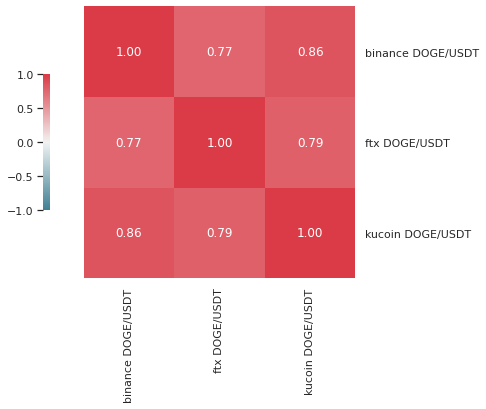

Current cluster is 8
Original series in cluster is ['ftx DOGE/USDT', 'kucoin DOGE/USDT', 'binance DOGE/USDT']
Series to keep in cluster is ['binance DOGE/USDT', 'ftx DOGE/USDT']


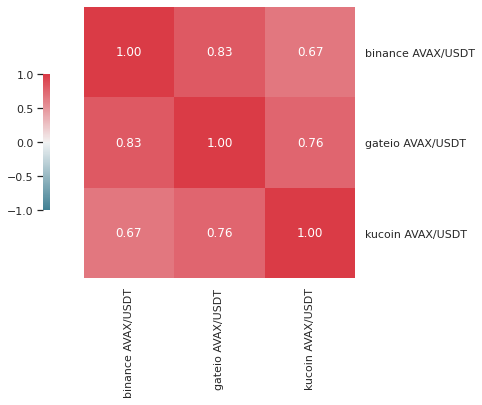

Current cluster is 9
Original series in cluster is ['gateio AVAX/USDT', 'binance AVAX/USDT', 'kucoin AVAX/USDT']
Series to keep in cluster is ['binance AVAX/USDT', 'kucoin AVAX/USDT']


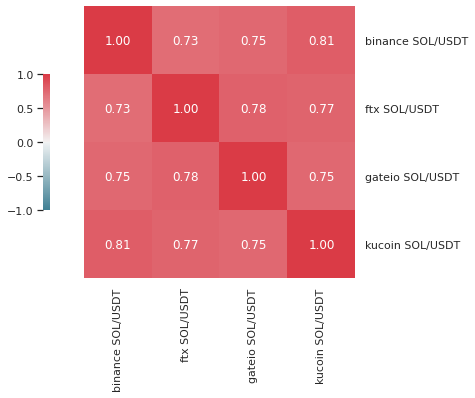

Current cluster is 10
Original series in cluster is ['kucoin SOL/USDT', 'ftx SOL/USDT', 'gateio SOL/USDT', 'binance SOL/USDT']
Series to keep in cluster is ['binance SOL/USDT', 'ftx SOL/USDT', 'gateio SOL/USDT']


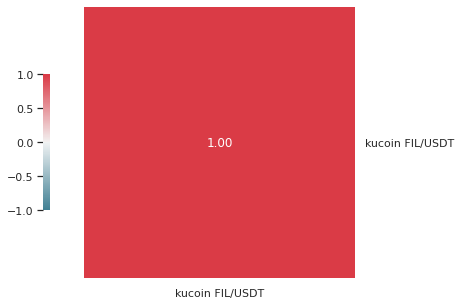

Current cluster is 11
Original series in cluster is ['kucoin FIL/USDT']
Series to keep in cluster is ['kucoin FIL/USDT']
Final number of selected time series is 27
Series to keep are: ['gateio ADA/USDT', 'gateio BNB/USDT', 'gateio BTC/USDT', 'gateio DOGE/USDT', 'gateio EOS/USDT', 'gateio LINK/USDT', 'gateio XRP/USDT', 'gateio FIL/USDT', 'ftx XRP/USDT', 'binance BNB/USDT', 'kucoin BNB/USDT', 'binance BTC/USDT', 'binance EOS/USDT', 'binance ETH/USDT', 'kucoin EOS/USDT', 'binance ADA/USDT', 'kucoin ADA/USDT', 'binance LINK/USDT', 'kucoin LINK/USDT', 'binance DOGE/USDT', 'ftx DOGE/USDT', 'binance AVAX/USDT', 'kucoin AVAX/USDT', 'binance SOL/USDT', 'ftx SOL/USDT', 'gateio SOL/USDT', 'kucoin FIL/USDT']


In [10]:
_ = coplotti.cluster_and_select(df_returns, 11)

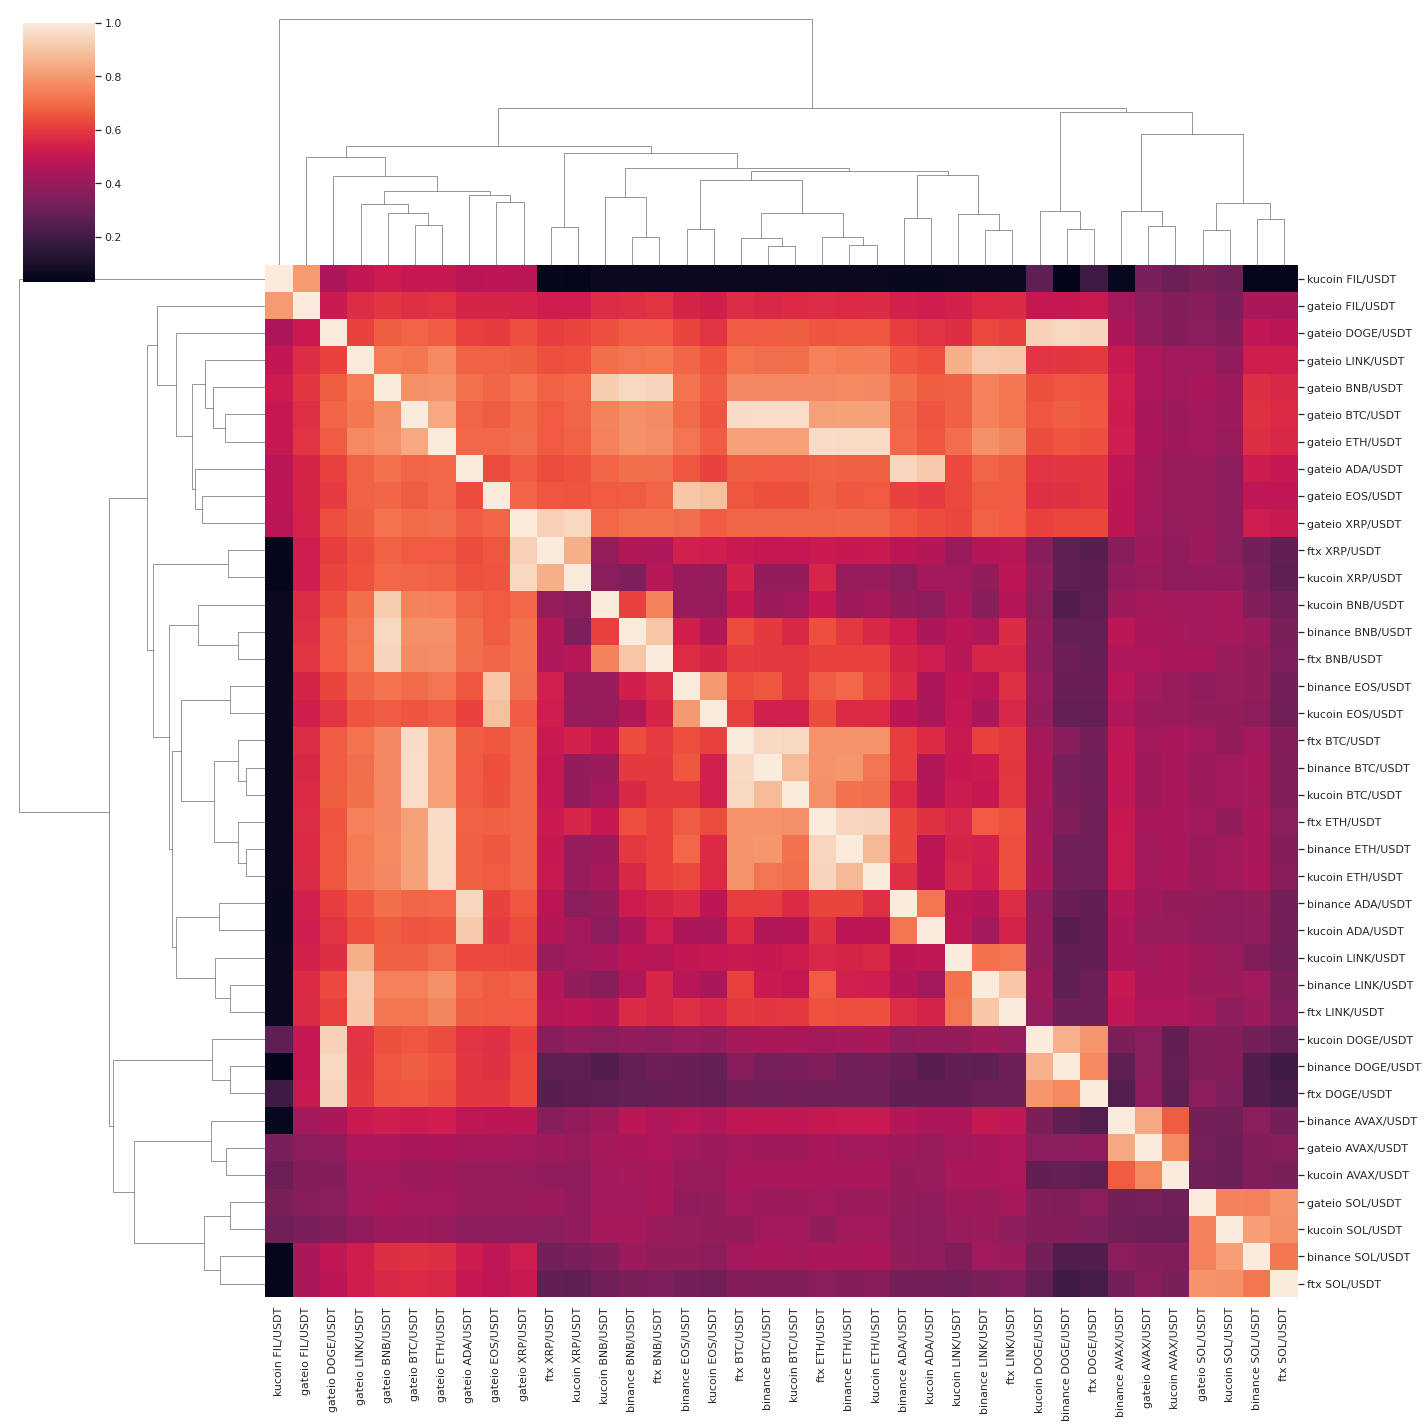

In [11]:
_ = sns.clustermap(corr_matrix, figsize=(20, 20))

In [12]:
# Display top 10 most correlated series for each currency pair.
for colname in corr_matrix.columns:
    corr_srs = corr_matrix[colname]
    corr_srs_sorted = corr_srs.sort_values(ascending=False)
    display(corr_srs_sorted.head(10))

binance ADA/USDT    1.000000
gateio ADA/USDT     0.944664
kucoin ADA/USDT     0.720469
gateio BNB/USDT     0.705092
gateio ETH/USDT     0.692818
gateio BTC/USDT     0.687551
gateio XRP/USDT     0.662369
gateio LINK/USDT    0.662019
binance ETH/USDT    0.625145
ftx ETH/USDT        0.624470
Name: binance ADA/USDT, dtype: float64

binance AVAX/USDT    1.000000
gateio AVAX/USDT     0.834062
kucoin AVAX/USDT     0.669087
gateio BNB/USDT      0.526929
gateio ETH/USDT      0.523876
gateio BTC/USDT      0.517972
kucoin ETH/USDT      0.510332
gateio LINK/USDT     0.510200
binance ETH/USDT     0.508276
binance LINK/USDT    0.507633
Name: binance AVAX/USDT, dtype: float64

binance BNB/USDT    1.000000
gateio BNB/USDT     0.949721
ftx BNB/USDT        0.903853
gateio BTC/USDT     0.777453
gateio ETH/USDT     0.777437
gateio LINK/USDT    0.718947
gateio XRP/USDT     0.710867
gateio ADA/USDT     0.705200
gateio EOS/USDT     0.669942
gateio DOGE/USDT    0.667337
Name: binance BNB/USDT, dtype: float64

binance BTC/USDT    1.000000
gateio BTC/USDT     0.963712
ftx BTC/USDT        0.953863
kucoin BTC/USDT     0.878891
gateio ETH/USDT     0.813837
binance ETH/USDT    0.789630
ftx ETH/USDT        0.781370
gateio BNB/USDT     0.758958
kucoin ETH/USDT     0.716707
gateio LINK/USDT    0.702086
Name: binance BTC/USDT, dtype: float64

binance DOGE/USDT    1.000000
gateio DOGE/USDT     0.950417
kucoin DOGE/USDT     0.855005
ftx DOGE/USDT        0.765061
gateio BTC/USDT      0.672000
gateio BNB/USDT      0.657051
gateio ETH/USDT      0.652952
gateio XRP/USDT      0.627209
gateio LINK/USDT     0.594410
gateio ADA/USDT      0.594250
Name: binance DOGE/USDT, dtype: float64

binance EOS/USDT    1.000000
gateio EOS/USDT     0.905676
kucoin EOS/USDT     0.799292
gateio ETH/USDT     0.717279
gateio BNB/USDT     0.712578
gateio XRP/USDT     0.701941
gateio BTC/USDT     0.699838
binance ETH/USDT    0.690614
gateio LINK/USDT    0.686727
ftx ETH/USDT        0.670324
Name: binance EOS/USDT, dtype: float64

binance ETH/USDT    1.000000
gateio ETH/USDT     0.957310
ftx ETH/USDT        0.946280
kucoin ETH/USDT     0.873923
gateio BTC/USDT     0.817644
binance BTC/USDT    0.789630
ftx BTC/USDT        0.785819
gateio BNB/USDT     0.761829
gateio LINK/USDT    0.734454
kucoin BTC/USDT     0.712124
Name: binance ETH/USDT, dtype: float64

binance LINK/USDT    1.000000
gateio LINK/USDT     0.912532
ftx LINK/USDT        0.905956
gateio ETH/USDT      0.776982
gateio BNB/USDT      0.745537
gateio BTC/USDT      0.744891
kucoin LINK/USDT     0.711930
gateio ADA/USDT      0.684521
gateio XRP/USDT      0.680928
gateio EOS/USDT      0.667514
Name: binance LINK/USDT, dtype: float64

binance SOL/USDT    1.000000
kucoin SOL/USDT     0.810575
gateio SOL/USDT     0.745813
ftx SOL/USDT        0.725650
gateio BTC/USDT     0.581416
gateio ETH/USDT     0.575396
gateio BNB/USDT     0.573421
gateio LINK/USDT    0.528800
gateio XRP/USDT     0.523184
gateio ADA/USDT     0.517625
Name: binance SOL/USDT, dtype: float64

ftx BNB/USDT        1.000000
gateio BNB/USDT     0.942337
binance BNB/USDT    0.903853
gateio ETH/USDT     0.771126
gateio BTC/USDT     0.768273
kucoin BNB/USDT     0.746558
gateio LINK/USDT    0.724786
gateio XRP/USDT     0.710090
gateio ADA/USDT     0.704222
gateio EOS/USDT     0.682997
Name: ftx BNB/USDT, dtype: float64

ftx BTC/USDT        1.000000
gateio BTC/USDT     0.961811
binance BTC/USDT    0.953863
kucoin BTC/USDT     0.950069
gateio ETH/USDT     0.817217
ftx ETH/USDT        0.786635
binance ETH/USDT    0.785819
kucoin ETH/USDT     0.782680
gateio BNB/USDT     0.761265
gateio LINK/USDT    0.714072
Name: ftx BTC/USDT, dtype: float64

ftx DOGE/USDT        1.000000
gateio DOGE/USDT     0.942983
kucoin DOGE/USDT     0.789320
binance DOGE/USDT    0.765061
gateio BTC/USDT      0.661325
gateio BNB/USDT      0.653362
gateio ETH/USDT      0.645668
gateio XRP/USDT      0.626563
gateio LINK/USDT     0.599163
gateio ADA/USDT      0.593527
Name: ftx DOGE/USDT, dtype: float64

ftx ETH/USDT        1.000000
gateio ETH/USDT     0.959046
binance ETH/USDT    0.946280
kucoin ETH/USDT     0.943107
gateio BTC/USDT     0.811606
ftx BTC/USDT        0.786635
binance BTC/USDT    0.781370
kucoin BTC/USDT     0.776370
gateio BNB/USDT     0.759020
gateio LINK/USDT    0.745140
Name: ftx ETH/USDT, dtype: float64

ftx LINK/USDT        1.000000
gateio LINK/USDT     0.906626
binance LINK/USDT    0.905956
gateio ETH/USDT      0.755621
gateio BNB/USDT      0.724757
gateio BTC/USDT      0.720228
kucoin LINK/USDT     0.718353
gateio ADA/USDT      0.671801
gateio EOS/USDT      0.668661
gateio XRP/USDT      0.664489
Name: ftx LINK/USDT, dtype: float64

ftx SOL/USDT        1.000000
gateio SOL/USDT     0.784850
kucoin SOL/USDT     0.773288
binance SOL/USDT    0.725650
gateio BTC/USDT     0.563368
gateio BNB/USDT     0.559957
gateio ETH/USDT     0.558961
gateio LINK/USDT    0.527562
gateio XRP/USDT     0.508869
gateio ADA/USDT     0.508013
Name: ftx SOL/USDT, dtype: float64

ftx XRP/USDT        1.000000
gateio XRP/USDT     0.931515
kucoin XRP/USDT     0.848908
gateio BNB/USDT     0.680320
gateio ETH/USDT     0.665871
gateio BTC/USDT     0.664605
gateio EOS/USDT     0.657223
gateio LINK/USDT    0.641734
gateio ADA/USDT     0.639355
gateio DOGE/USDT    0.609261
Name: ftx XRP/USDT, dtype: float64

gateio ADA/USDT      1.000000
binance ADA/USDT     0.944664
kucoin ADA/USDT      0.916007
gateio BNB/USDT      0.711904
binance BNB/USDT     0.705200
ftx BNB/USDT         0.704222
gateio ETH/USDT      0.693160
kucoin BNB/USDT      0.684863
gateio BTC/USDT      0.684834
binance LINK/USDT    0.684521
Name: gateio ADA/USDT, dtype: float64

gateio AVAX/USDT     1.000000
binance AVAX/USDT    0.834062
kucoin AVAX/USDT     0.762211
gateio BNB/USDT      0.454309
ftx BNB/USDT         0.452981
gateio LINK/USDT     0.449191
ftx LINK/USDT        0.447842
gateio ETH/USDT      0.444110
binance BNB/USDT     0.436434
ftx ETH/USDT         0.434597
Name: gateio AVAX/USDT, dtype: float64

gateio BNB/USDT     1.000000
binance BNB/USDT    0.949721
ftx BNB/USDT        0.942337
kucoin BNB/USDT     0.920082
gateio ETH/USDT     0.780750
gateio BTC/USDT     0.777201
binance ETH/USDT    0.761829
ftx BTC/USDT        0.761265
kucoin BTC/USDT     0.759233
ftx ETH/USDT        0.759020
Name: gateio BNB/USDT, dtype: float64

gateio BTC/USDT     1.000000
kucoin BTC/USDT     0.964046
binance BTC/USDT    0.963712
ftx BTC/USDT        0.961811
gateio ETH/USDT     0.832929
binance ETH/USDT    0.817644
kucoin ETH/USDT     0.816690
ftx ETH/USDT        0.811606
binance BNB/USDT    0.777453
gateio BNB/USDT     0.777201
Name: gateio BTC/USDT, dtype: float64

gateio DOGE/USDT     1.000000
binance DOGE/USDT    0.950417
ftx DOGE/USDT        0.942983
kucoin DOGE/USDT     0.935043
gateio BTC/USDT      0.683062
kucoin BTC/USDT      0.672372
gateio BNB/USDT      0.671944
ftx BTC/USDT         0.669533
binance BTC/USDT     0.669173
gateio ETH/USDT      0.668558
Name: gateio DOGE/USDT, dtype: float64

gateio EOS/USDT     1.000000
binance EOS/USDT    0.905676
kucoin EOS/USDT     0.888575
gateio ETH/USDT     0.690298
gateio BNB/USDT     0.689787
ftx BNB/USDT        0.682997
gateio XRP/USDT     0.682576
gateio LINK/USDT    0.679797
ftx ETH/USDT        0.675412
binance BNB/USDT    0.669942
Name: gateio EOS/USDT, dtype: float64

gateio ETH/USDT     1.000000
ftx ETH/USDT        0.959046
binance ETH/USDT    0.957310
kucoin ETH/USDT     0.955961
gateio BTC/USDT     0.832929
ftx BTC/USDT        0.817217
kucoin BTC/USDT     0.814619
binance BTC/USDT    0.813837
gateio BNB/USDT     0.780750
binance BNB/USDT    0.777437
Name: gateio ETH/USDT, dtype: float64

gateio FIL/USDT     1.000000
kucoin FIL/USDT     0.801710
gateio BNB/USDT     0.592413
ftx BNB/USDT        0.586451
gateio ETH/USDT     0.584028
binance BNB/USDT    0.580047
gateio BTC/USDT     0.578779
kucoin BNB/USDT     0.572505
ftx ETH/USDT        0.572030
gateio LINK/USDT    0.571814
Name: gateio FIL/USDT, dtype: float64

gateio LINK/USDT     1.000000
binance LINK/USDT    0.912532
ftx LINK/USDT        0.906626
kucoin LINK/USDT     0.849776
gateio ETH/USDT      0.762010
ftx ETH/USDT         0.745140
kucoin ETH/USDT      0.735671
gateio BNB/USDT      0.734777
binance ETH/USDT     0.734454
gateio BTC/USDT      0.727597
Name: gateio LINK/USDT, dtype: float64

gateio SOL/USDT     1.000000
ftx SOL/USDT        0.784850
kucoin SOL/USDT     0.749827
binance SOL/USDT    0.745813
ftx BNB/USDT        0.439812
gateio BNB/USDT     0.434047
ftx LINK/USDT       0.429319
gateio BTC/USDT     0.427696
gateio ETH/USDT     0.425212
kucoin BNB/USDT     0.423488
Name: gateio SOL/USDT, dtype: float64

gateio XRP/USDT     1.000000
kucoin XRP/USDT     0.947989
ftx XRP/USDT        0.931515
gateio BNB/USDT     0.715926
binance BNB/USDT    0.710867
ftx BNB/USDT        0.710090
gateio ETH/USDT     0.703600
binance EOS/USDT    0.701941
gateio BTC/USDT     0.700489
kucoin BNB/USDT     0.691600
Name: gateio XRP/USDT, dtype: float64

kucoin ADA/USDT     1.000000
gateio ADA/USDT     0.916007
binance ADA/USDT    0.720469
gateio BNB/USDT     0.673396
gateio ETH/USDT     0.657313
gateio BTC/USDT     0.655173
gateio LINK/USDT    0.642992
gateio XRP/USDT     0.637176
gateio EOS/USDT     0.605663
gateio DOGE/USDT    0.587565
Name: kucoin ADA/USDT, dtype: float64

kucoin AVAX/USDT     1.000000
gateio AVAX/USDT     0.762211
binance AVAX/USDT    0.669087
ftx LINK/USDT        0.447872
kucoin LINK/USDT     0.443774
binance LINK/USDT    0.442663
kucoin BTC/USDT      0.440265
kucoin ETH/USDT      0.437724
ftx BNB/USDT         0.435685
binance BTC/USDT     0.435614
Name: kucoin AVAX/USDT, dtype: float64

kucoin BNB/USDT     1.000000
gateio BNB/USDT     0.920082
gateio BTC/USDT     0.748912
ftx BNB/USDT        0.746558
gateio ETH/USDT     0.746169
gateio LINK/USDT    0.705244
gateio XRP/USDT     0.691600
gateio ADA/USDT     0.684863
gateio EOS/USDT     0.663672
gateio DOGE/USDT    0.647927
Name: kucoin BNB/USDT, dtype: float64

kucoin BTC/USDT     1.000000
gateio BTC/USDT     0.964046
ftx BTC/USDT        0.950069
binance BTC/USDT    0.878891
gateio ETH/USDT     0.814619
ftx ETH/USDT        0.776370
gateio BNB/USDT     0.759233
binance ETH/USDT    0.712124
gateio LINK/USDT    0.705537
kucoin ETH/USDT     0.703559
Name: kucoin BTC/USDT, dtype: float64

kucoin DOGE/USDT     1.000000
gateio DOGE/USDT     0.935043
binance DOGE/USDT    0.855005
ftx DOGE/USDT        0.789320
gateio BTC/USDT      0.658788
gateio BNB/USDT      0.646635
gateio ETH/USDT      0.639867
gateio XRP/USDT      0.621416
gateio LINK/USDT     0.589599
gateio ADA/USDT      0.585649
Name: kucoin DOGE/USDT, dtype: float64

kucoin EOS/USDT     1.000000
gateio EOS/USDT     0.888575
binance EOS/USDT    0.799292
gateio BNB/USDT     0.670555
gateio ETH/USDT     0.669916
gateio XRP/USDT     0.667664
gateio LINK/USDT    0.653734
gateio BTC/USDT     0.653529
ftx ETH/USDT        0.636982
gateio ADA/USDT     0.619445
Name: kucoin EOS/USDT, dtype: float64

kucoin ETH/USDT     1.000000
gateio ETH/USDT     0.955961
ftx ETH/USDT        0.943107
binance ETH/USDT    0.873923
gateio BTC/USDT     0.816690
ftx BTC/USDT        0.782680
gateio BNB/USDT     0.758519
gateio LINK/USDT    0.735671
binance BTC/USDT    0.716707
kucoin BTC/USDT     0.703559
Name: kucoin ETH/USDT, dtype: float64

kucoin FIL/USDT     1.000000
gateio FIL/USDT     0.801710
gateio BNB/USDT     0.518836
gateio BTC/USDT     0.504985
gateio ETH/USDT     0.504784
gateio LINK/USDT    0.491916
gateio EOS/USDT     0.478109
gateio ADA/USDT     0.473906
gateio XRP/USDT     0.473433
gateio DOGE/USDT    0.446570
Name: kucoin FIL/USDT, dtype: float64

kucoin LINK/USDT     1.000000
gateio LINK/USDT     0.849776
ftx LINK/USDT        0.718353
binance LINK/USDT    0.711930
gateio ETH/USDT      0.701378
gateio BTC/USDT      0.677324
gateio BNB/USDT      0.677158
gateio EOS/USDT      0.632860
gateio ADA/USDT      0.631304
gateio XRP/USDT      0.628116
Name: kucoin LINK/USDT, dtype: float64

kucoin SOL/USDT     1.000000
binance SOL/USDT    0.810575
ftx SOL/USDT        0.773288
gateio SOL/USDT     0.749827
binance BNB/USDT    0.431033
kucoin BNB/USDT     0.429428
kucoin BTC/USDT     0.422371
binance BTC/USDT    0.421972
binance ETH/USDT    0.420626
kucoin ETH/USDT     0.420464
Name: kucoin SOL/USDT, dtype: float64

kucoin XRP/USDT     1.000000
gateio XRP/USDT     0.947989
ftx XRP/USDT        0.848908
gateio BNB/USDT     0.690593
gateio BTC/USDT     0.683479
gateio ETH/USDT     0.680061
gateio EOS/USDT     0.655407
gateio LINK/USDT    0.651262
gateio ADA/USDT     0.650108
gateio DOGE/USDT    0.625242
Name: kucoin XRP/USDT, dtype: float64

# Calculations on data resampled to 1 day

In [13]:
df_price_1day = df_price.resample("D", closed="right", label="right").mean()
df_price_1day.head(3)

,binance ADA/USDT,binance AVAX/USDT,binance BNB/USDT,binance BTC/USDT,binance DOGE/USDT,binance EOS/USDT,binance ETH/USDT,binance LINK/USDT,binance SOL/USDT,ftx BNB/USDT,ftx BTC/USDT,ftx DOGE/USDT,ftx ETH/USDT,ftx LINK/USDT,ftx SOL/USDT,ftx XRP/USDT,gateio ADA/USDT,gateio AVAX/USDT,gateio BNB/USDT,gateio BTC/USDT,gateio DOGE/USDT,gateio EOS/USDT,gateio ETH/USDT,gateio FIL/USDT,gateio LINK/USDT,gateio SOL/USDT,gateio XRP/USDT,kucoin ADA/USDT,kucoin AVAX/USDT,kucoin BNB/USDT,kucoin BTC/USDT,kucoin DOGE/USDT,kucoin EOS/USDT,kucoin ETH/USDT,kucoin FIL/USDT,kucoin LINK/USDT,kucoin SOL/USDT,kucoin XRP/USDT
2018-08-17 00:00:00-04:00,0.096818,NaN,9.930870,6366.189627,NaN,4.643779,293.124896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6369.995844,NaN,4.674682,293.276835,NaN,NaN,NaN,NaN
2018-08-18 00:00:00-04:00,0.102773,NaN,10.306990,6494.228583,NaN,5.081949,303.369576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6491.991336,NaN,5.152543,303.782117,NaN,NaN,NaN,NaN
2018-08-19 00:00:00-04:00,0.100311,NaN,9.993176,6410.562479,NaN,5.150407,298.524937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6412.406872,NaN,5.083150,298.310958,NaN,NaN,NaN,NaN


In [14]:
df_returns_1day = df_price_1day.pct_change()
df_returns_1day.head(3)

,binance ADA/USDT,binance AVAX/USDT,binance BNB/USDT,binance BTC/USDT,binance DOGE/USDT,binance EOS/USDT,binance ETH/USDT,binance LINK/USDT,binance SOL/USDT,ftx BNB/USDT,ftx BTC/USDT,ftx DOGE/USDT,ftx ETH/USDT,ftx LINK/USDT,ftx SOL/USDT,ftx XRP/USDT,gateio ADA/USDT,gateio AVAX/USDT,gateio BNB/USDT,gateio BTC/USDT,gateio DOGE/USDT,gateio EOS/USDT,gateio ETH/USDT,gateio FIL/USDT,gateio LINK/USDT,gateio SOL/USDT,gateio XRP/USDT,kucoin ADA/USDT,kucoin AVAX/USDT,kucoin BNB/USDT,kucoin BTC/USDT,kucoin DOGE/USDT,kucoin EOS/USDT,kucoin ETH/USDT,kucoin FIL/USDT,kucoin LINK/USDT,kucoin SOL/USDT,kucoin XRP/USDT
2018-08-17 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-18 00:00:00-04:00,0.061508,NaN,0.037874,0.020112,NaN,0.094356,0.034950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019152,NaN,0.102223,0.03582,NaN,NaN,NaN,NaN
2018-08-19 00:00:00-04:00,-0.023960,NaN,-0.030447,-0.012883,NaN,0.013471,-0.015969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.012259,NaN,-0.013468,-0.01801,NaN,NaN,NaN,NaN


The corr_df.shape[0]='38' > 20


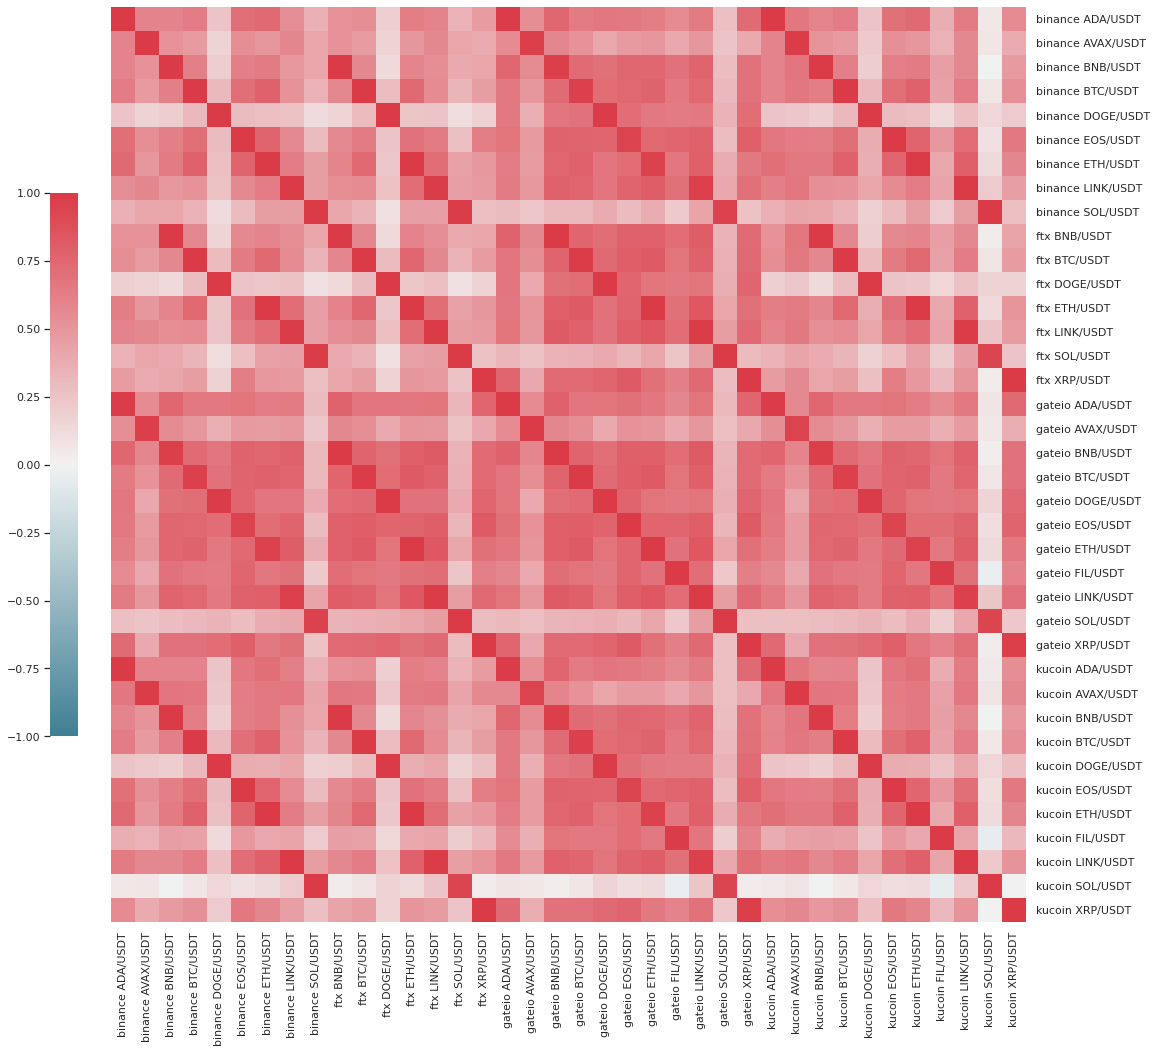

In [15]:
corr_matrix_1day = df_returns_1day.corr()
_ = coplotti.plot_heatmap(corr_matrix_1day)

Resampling to 1 day makes clusters much more visible. <br>
If we take a look at correlation numbers, we can see that equal currencies on different exchanges have a correlation above ~0.94 while different currencies correlate at much less rate.

Therefore, it seems that for detecting similar currencies we'd better use 1 day frequency.

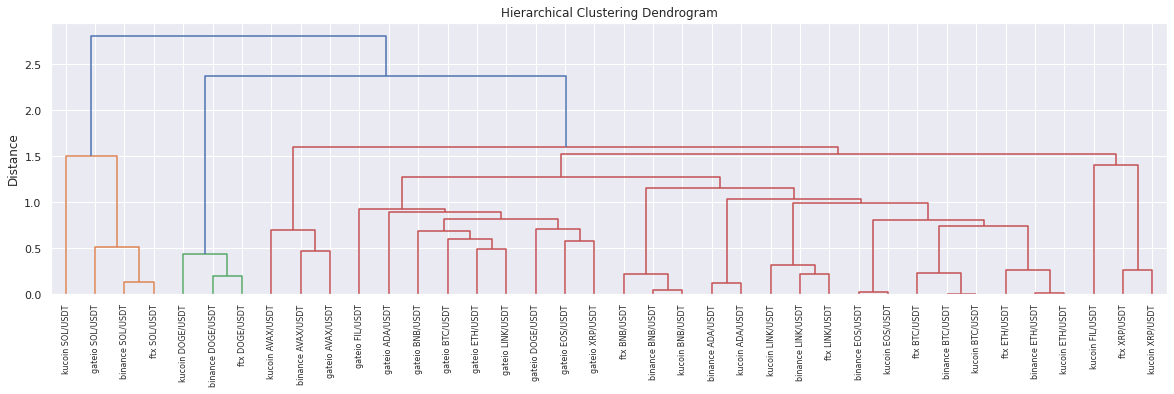

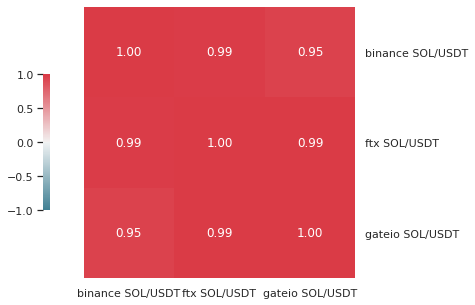

Current cluster is 1
Original series in cluster is ['ftx SOL/USDT', 'gateio SOL/USDT', 'binance SOL/USDT']
Series to keep in cluster is ['binance SOL/USDT']


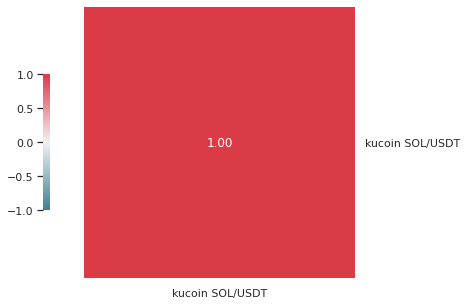

Current cluster is 2
Original series in cluster is ['kucoin SOL/USDT']
Series to keep in cluster is ['kucoin SOL/USDT']


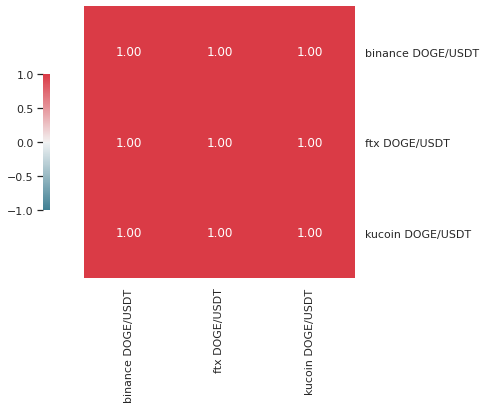

Current cluster is 3
Original series in cluster is ['ftx DOGE/USDT', 'kucoin DOGE/USDT', 'binance DOGE/USDT']
Series to keep in cluster is ['binance DOGE/USDT']


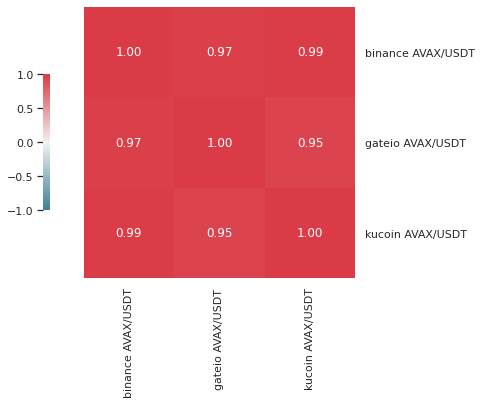

Current cluster is 4
Original series in cluster is ['gateio AVAX/USDT', 'binance AVAX/USDT', 'kucoin AVAX/USDT']
Series to keep in cluster is ['binance AVAX/USDT']


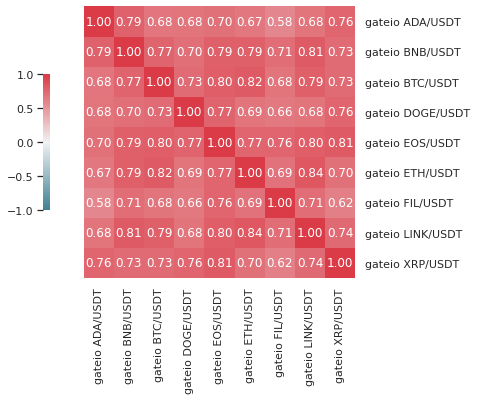

Current cluster is 5
Original series in cluster is ['gateio ADA/USDT', 'gateio XRP/USDT', 'gateio FIL/USDT', 'gateio ETH/USDT', 'gateio EOS/USDT', 'gateio LINK/USDT', 'gateio BNB/USDT', 'gateio BTC/USDT', 'gateio DOGE/USDT']
Series to keep in cluster is ['gateio ADA/USDT', 'gateio BTC/USDT', 'gateio DOGE/USDT', 'gateio FIL/USDT', 'gateio LINK/USDT', 'gateio XRP/USDT']


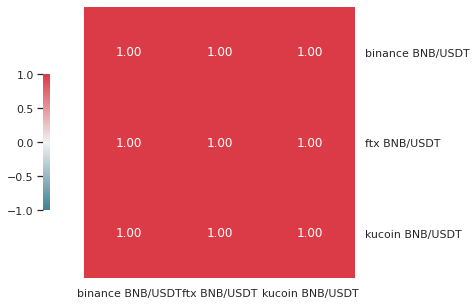

Current cluster is 6
Original series in cluster is ['binance BNB/USDT', 'kucoin BNB/USDT', 'ftx BNB/USDT']
Series to keep in cluster is ['binance BNB/USDT']


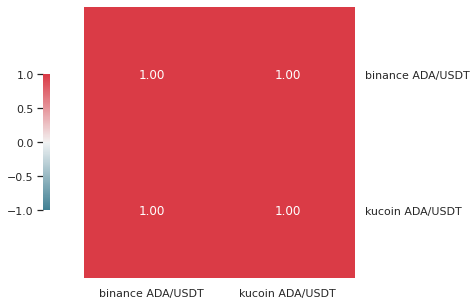

Current cluster is 7
Original series in cluster is ['binance ADA/USDT', 'kucoin ADA/USDT']
Series to keep in cluster is ['binance ADA/USDT']


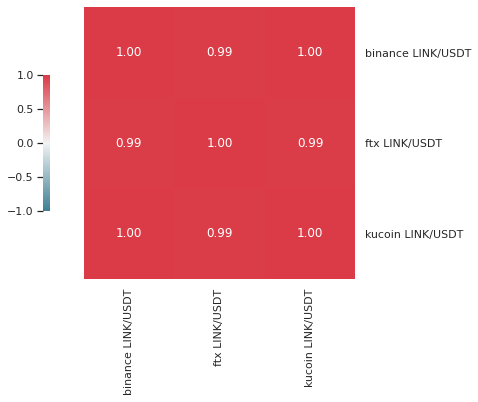

Current cluster is 8
Original series in cluster is ['ftx LINK/USDT', 'kucoin LINK/USDT', 'binance LINK/USDT']
Series to keep in cluster is ['binance LINK/USDT']


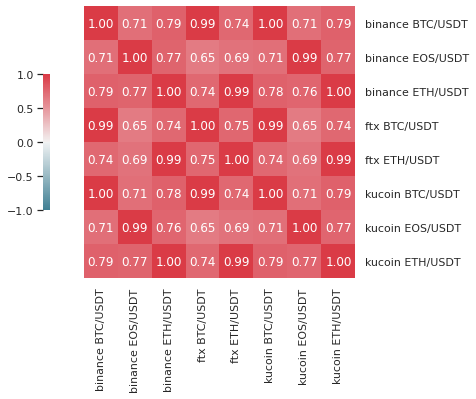

Current cluster is 9
Original series in cluster is ['binance EOS/USDT', 'binance BTC/USDT', 'kucoin BTC/USDT', 'kucoin ETH/USDT', 'binance ETH/USDT', 'ftx BTC/USDT', 'kucoin EOS/USDT', 'ftx ETH/USDT']
Series to keep in cluster is ['binance BTC/USDT', 'binance EOS/USDT', 'binance ETH/USDT']


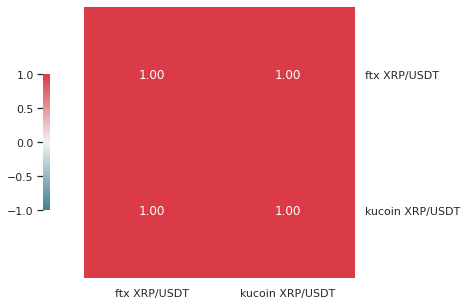

Current cluster is 10
Original series in cluster is ['ftx XRP/USDT', 'kucoin XRP/USDT']
Series to keep in cluster is ['ftx XRP/USDT']


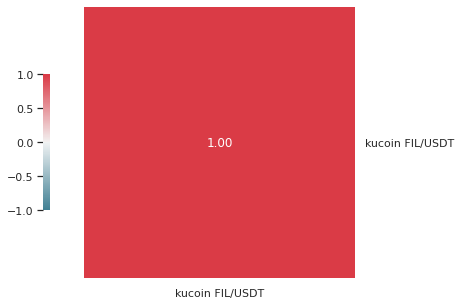

Current cluster is 11
Original series in cluster is ['kucoin FIL/USDT']
Series to keep in cluster is ['kucoin FIL/USDT']
Final number of selected time series is 18
Series to keep are: ['binance SOL/USDT', 'kucoin SOL/USDT', 'binance DOGE/USDT', 'binance AVAX/USDT', 'gateio ADA/USDT', 'gateio BTC/USDT', 'gateio DOGE/USDT', 'gateio FIL/USDT', 'gateio LINK/USDT', 'gateio XRP/USDT', 'binance BNB/USDT', 'binance ADA/USDT', 'binance LINK/USDT', 'binance BTC/USDT', 'binance EOS/USDT', 'binance ETH/USDT', 'ftx XRP/USDT', 'kucoin FIL/USDT']


In [16]:
_ = coplotti.cluster_and_select(df_returns_1day, 11)

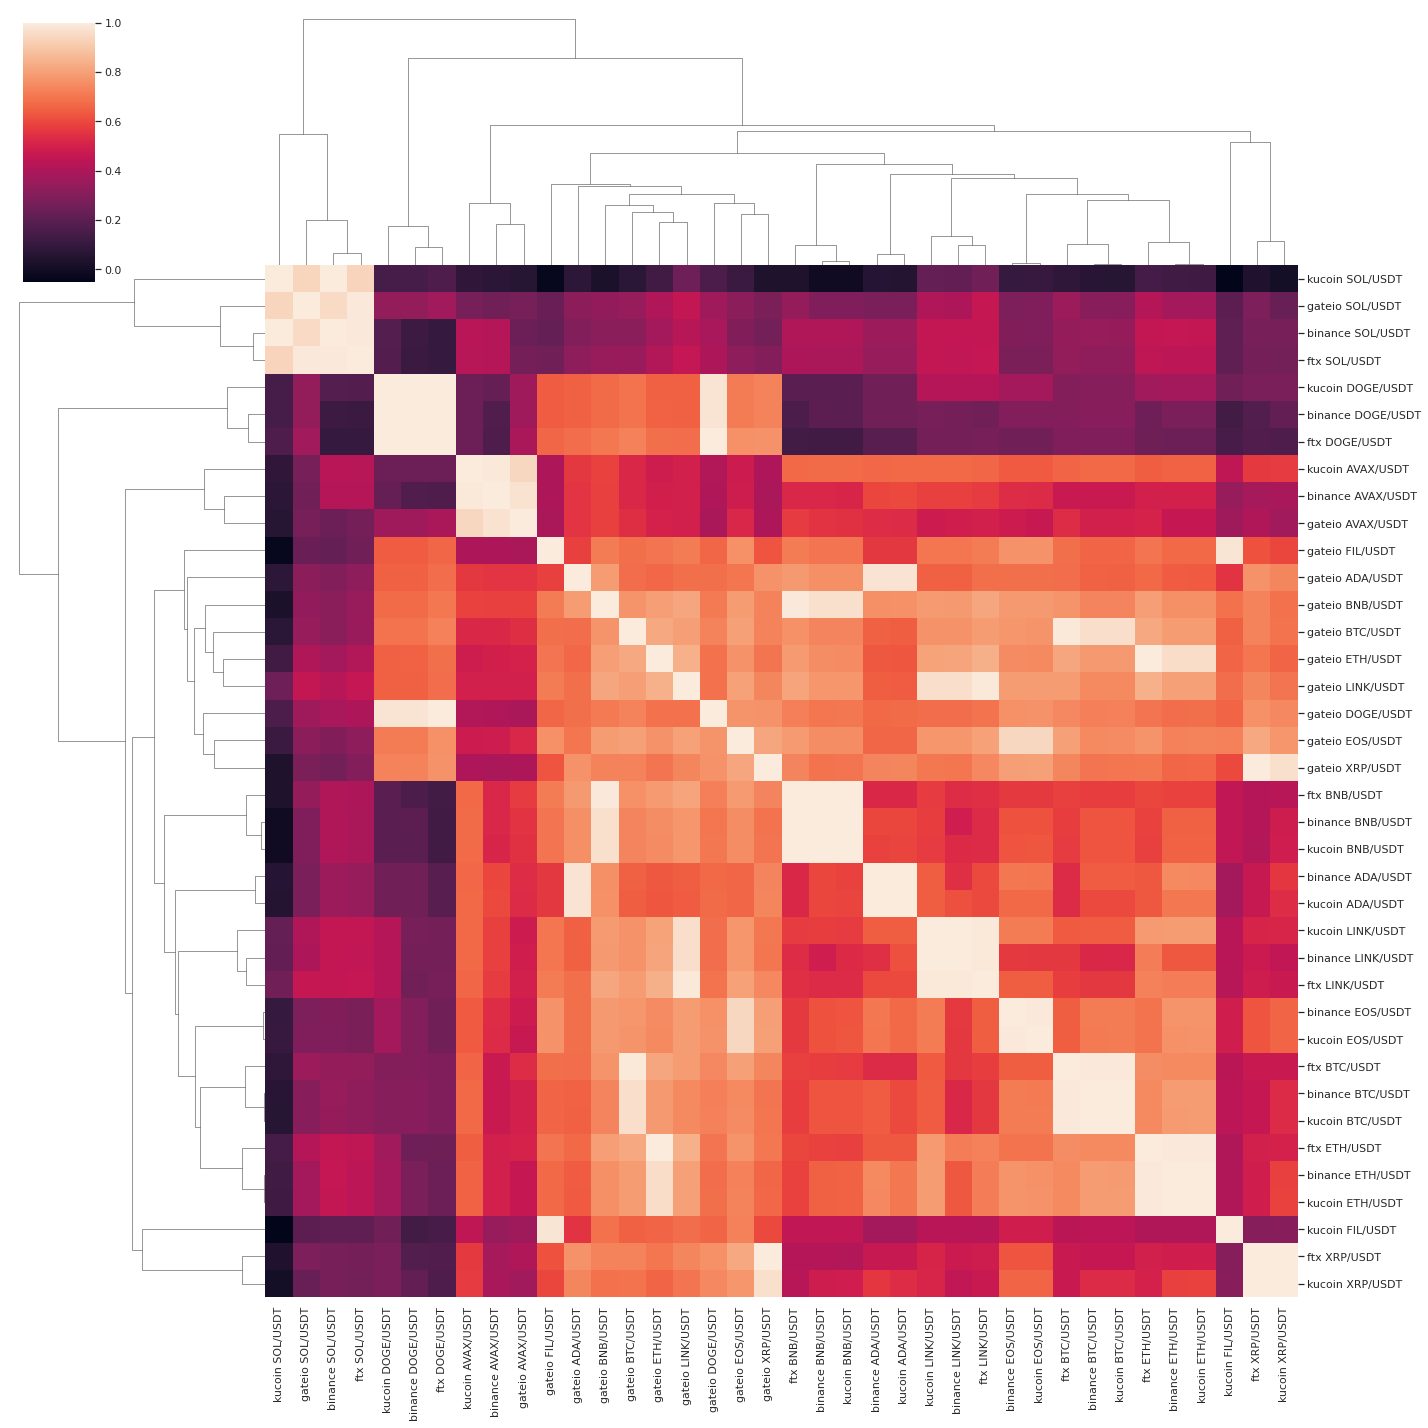

In [17]:
_ = sns.clustermap(corr_matrix_1day, figsize=(20, 20))

In [18]:
# Display top 10 most correlated series for each currency pair.
for colname in corr_matrix_1day.columns:
    corr_srs = corr_matrix_1day[colname]
    corr_srs_sorted = corr_srs.sort_values(ascending=False)
    display(corr_srs_sorted.head(10))

binance ADA/USDT    1.000000
kucoin ADA/USDT     0.999476
gateio ADA/USDT     0.977112
gateio BNB/USDT     0.757742
binance ETH/USDT    0.741958
kucoin ETH/USDT     0.740441
gateio XRP/USDT     0.729552
binance EOS/USDT    0.704082
kucoin EOS/USDT     0.698861
gateio DOGE/USDT    0.670653
Name: binance ADA/USDT, dtype: float64

binance AVAX/USDT    1.000000
kucoin AVAX/USDT     0.990664
gateio AVAX/USDT     0.972823
kucoin ADA/USDT      0.599011
binance ADA/USDT     0.597068
gateio BNB/USDT      0.583773
binance LINK/USDT    0.578303
kucoin LINK/USDT     0.577479
ftx LINK/USDT        0.572118
gateio ADA/USDT      0.556685
Name: binance AVAX/USDT, dtype: float64

binance BNB/USDT    1.000000
kucoin BNB/USDT     0.999668
ftx BNB/USDT        0.996702
gateio BNB/USDT     0.970041
gateio LINK/USDT    0.771870
gateio ADA/USDT     0.755640
gateio EOS/USDT     0.750897
gateio ETH/USDT     0.750783
gateio BTC/USDT     0.731519
gateio DOGE/USDT    0.700217
Name: binance BNB/USDT, dtype: float64

binance BTC/USDT    1.000000
kucoin BTC/USDT     0.999047
ftx BTC/USDT        0.992417
gateio BTC/USDT     0.964043
kucoin ETH/USDT     0.787648
binance ETH/USDT    0.786749
gateio ETH/USDT     0.780007
gateio LINK/USDT    0.745258
gateio EOS/USDT     0.744599
ftx ETH/USDT        0.744403
Name: binance BTC/USDT, dtype: float64

binance DOGE/USDT    1.000000
kucoin DOGE/USDT     0.999582
ftx DOGE/USDT        0.999139
gateio DOGE/USDT     0.978500
gateio XRP/USDT      0.725924
gateio EOS/USDT      0.712058
gateio BTC/USDT      0.691638
gateio BNB/USDT      0.674200
gateio ETH/USDT      0.652276
gateio ADA/USDT      0.650863
Name: binance DOGE/USDT, dtype: float64

binance EOS/USDT    1.000000
kucoin EOS/USDT     0.993057
gateio EOS/USDT     0.945364
gateio XRP/USDT     0.791263
gateio LINK/USDT    0.788057
gateio BNB/USDT     0.780620
gateio BTC/USDT     0.771759
binance ETH/USDT    0.766575
kucoin ETH/USDT     0.766351
gateio FIL/USDT     0.762078
Name: binance EOS/USDT, dtype: float64

binance ETH/USDT    1.000000
kucoin ETH/USDT     0.997866
ftx ETH/USDT        0.992580
gateio ETH/USDT     0.959579
gateio LINK/USDT    0.795301
kucoin LINK/USDT    0.789383
gateio BTC/USDT     0.788222
binance BTC/USDT    0.786749
kucoin BTC/USDT     0.784662
binance EOS/USDT    0.766575
Name: binance ETH/USDT, dtype: float64

binance LINK/USDT    1.000000
kucoin LINK/USDT     0.999492
ftx LINK/USDT        0.991781
gateio LINK/USDT     0.963890
gateio ETH/USDT      0.808984
gateio BNB/USDT      0.782426
gateio EOS/USDT      0.773352
gateio BTC/USDT      0.763430
ftx ETH/USDT         0.712900
gateio XRP/USDT      0.698134
Name: binance LINK/USDT, dtype: float64

binance SOL/USDT     1.000000
kucoin SOL/USDT      0.999418
ftx SOL/USDT         0.992133
gateio SOL/USDT      0.953566
binance ETH/USDT     0.455547
kucoin LINK/USDT     0.454166
kucoin ETH/USDT      0.453605
binance LINK/USDT    0.453580
ftx ETH/USDT         0.450497
ftx LINK/USDT        0.450244
Name: binance SOL/USDT, dtype: float64

ftx BNB/USDT        1.000000
binance BNB/USDT    0.996702
kucoin BNB/USDT     0.996518
gateio BNB/USDT     0.992970
gateio LINK/USDT    0.807396
gateio EOS/USDT     0.785455
gateio ETH/USDT     0.783051
gateio ADA/USDT     0.780991
gateio BTC/USDT     0.761289
gateio XRP/USDT     0.732951
Name: ftx BNB/USDT, dtype: float64

ftx BTC/USDT        1.000000
kucoin BTC/USDT     0.992468
binance BTC/USDT    0.992417
gateio BTC/USDT     0.991602
gateio ETH/USDT     0.815054
gateio EOS/USDT     0.798112
gateio LINK/USDT    0.788383
gateio BNB/USDT     0.768845
ftx ETH/USDT        0.752681
kucoin ETH/USDT     0.744610
Name: ftx BTC/USDT, dtype: float64

ftx DOGE/USDT        1.000000
binance DOGE/USDT    0.999139
gateio DOGE/USDT     0.997827
kucoin DOGE/USDT     0.997397
gateio XRP/USDT      0.762260
gateio EOS/USDT      0.761154
gateio BTC/USDT      0.722371
gateio BNB/USDT      0.702593
gateio ETH/USDT      0.680275
gateio LINK/USDT     0.679834
Name: ftx DOGE/USDT, dtype: float64

ftx ETH/USDT        1.000000
gateio ETH/USDT     0.995962
kucoin ETH/USDT     0.992771
binance ETH/USDT    0.992580
gateio LINK/USDT    0.840905
gateio BTC/USDT     0.820821
gateio BNB/USDT     0.794063
kucoin LINK/USDT    0.785720
gateio EOS/USDT     0.767572
ftx BTC/USDT        0.752681
Name: ftx ETH/USDT, dtype: float64

ftx LINK/USDT        1.000000
gateio LINK/USDT     0.991790
binance LINK/USDT    0.991781
kucoin LINK/USDT     0.990940
gateio ETH/USDT      0.836723
gateio BNB/USDT      0.813438
gateio EOS/USDT      0.799066
gateio BTC/USDT      0.788908
gateio XRP/USDT      0.739416
ftx ETH/USDT         0.724486
Name: ftx LINK/USDT, dtype: float64

ftx SOL/USDT         1.000000
gateio SOL/USDT      0.993181
binance SOL/USDT     0.992133
kucoin SOL/USDT      0.938192
gateio LINK/USDT     0.457390
ftx LINK/USDT        0.455076
kucoin LINK/USDT     0.450631
binance LINK/USDT    0.446199
ftx ETH/USDT         0.442528
binance ETH/USDT     0.437602
Name: ftx SOL/USDT, dtype: float64

ftx XRP/USDT        1.000000
gateio XRP/USDT     0.998917
kucoin XRP/USDT     0.995989
gateio EOS/USDT     0.816684
gateio ADA/USDT     0.765558
gateio DOGE/USDT    0.758676
gateio LINK/USDT    0.737220
gateio BTC/USDT     0.729069
gateio BNB/USDT     0.727487
gateio ETH/USDT     0.698668
Name: ftx XRP/USDT, dtype: float64

gateio ADA/USDT     1.000000
kucoin ADA/USDT     0.977743
binance ADA/USDT    0.977112
gateio BNB/USDT     0.787234
ftx BNB/USDT        0.780991
ftx XRP/USDT        0.765558
gateio XRP/USDT     0.764487
binance BNB/USDT    0.755640
kucoin BNB/USDT     0.754661
kucoin XRP/USDT     0.735403
Name: gateio ADA/USDT, dtype: float64

gateio AVAX/USDT     1.000000
binance AVAX/USDT    0.972823
kucoin AVAX/USDT     0.946317
gateio BNB/USDT      0.581491
ftx BNB/USDT         0.573204
gateio ADA/USDT      0.554869
binance BNB/USDT     0.551908
kucoin BNB/USDT      0.548200
gateio BTC/USDT      0.536445
ftx BTC/USDT         0.534375
Name: gateio AVAX/USDT, dtype: float64

gateio BNB/USDT     1.000000
ftx BNB/USDT        0.992970
kucoin BNB/USDT     0.970237
binance BNB/USDT    0.970041
gateio LINK/USDT    0.814500
ftx LINK/USDT       0.813438
ftx ETH/USDT        0.794063
gateio ETH/USDT     0.791406
gateio EOS/USDT     0.790045
gateio ADA/USDT     0.787234
Name: gateio BNB/USDT, dtype: float64

gateio BTC/USDT     1.000000
ftx BTC/USDT        0.991602
kucoin BTC/USDT     0.964432
binance BTC/USDT    0.964043
ftx ETH/USDT        0.820821
gateio ETH/USDT     0.820501
gateio EOS/USDT     0.798545
gateio LINK/USDT    0.791453
ftx LINK/USDT       0.788908
binance ETH/USDT    0.788222
Name: gateio BTC/USDT, dtype: float64

gateio DOGE/USDT     1.000000
ftx DOGE/USDT        0.997827
kucoin DOGE/USDT     0.978761
binance DOGE/USDT    0.978500
gateio EOS/USDT      0.767023
gateio XRP/USDT      0.762670
kucoin EOS/USDT      0.762471
binance EOS/USDT     0.760313
ftx XRP/USDT         0.758676
ftx BTC/USDT         0.738970
Name: gateio DOGE/USDT, dtype: float64

gateio EOS/USDT     1.000000
binance EOS/USDT    0.945364
kucoin EOS/USDT     0.944749
ftx XRP/USDT        0.816684
gateio XRP/USDT     0.813102
gateio LINK/USDT    0.800427
ftx LINK/USDT       0.799066
gateio BTC/USDT     0.798545
ftx BTC/USDT        0.798112
gateio BNB/USDT     0.790045
Name: gateio EOS/USDT, dtype: float64

gateio ETH/USDT      1.000000
ftx ETH/USDT         0.995962
kucoin ETH/USDT      0.959798
binance ETH/USDT     0.959579
gateio LINK/USDT     0.841758
ftx LINK/USDT        0.836723
gateio BTC/USDT      0.820501
ftx BTC/USDT         0.815054
binance LINK/USDT    0.808984
kucoin LINK/USDT     0.805376
Name: gateio ETH/USDT, dtype: float64

gateio FIL/USDT     1.000000
kucoin FIL/USDT     0.983506
kucoin EOS/USDT     0.762567
binance EOS/USDT    0.762078
gateio EOS/USDT     0.761131
gateio LINK/USDT    0.712667
gateio BNB/USDT     0.711987
ftx BNB/USDT        0.711426
ftx LINK/USDT       0.711269
kucoin LINK/USDT    0.698920
Name: gateio FIL/USDT, dtype: float64

gateio LINK/USDT     1.000000
ftx LINK/USDT        0.991790
kucoin LINK/USDT     0.966337
binance LINK/USDT    0.963890
gateio ETH/USDT      0.841758
ftx ETH/USDT         0.840905
gateio BNB/USDT      0.814500
ftx BNB/USDT         0.807396
gateio EOS/USDT      0.800427
kucoin ETH/USDT      0.795459
Name: gateio LINK/USDT, dtype: float64

gateio SOL/USDT      1.000000
ftx SOL/USDT         0.993181
binance SOL/USDT     0.953566
kucoin SOL/USDT      0.942445
ftx LINK/USDT        0.459043
gateio LINK/USDT     0.453294
ftx ETH/USDT         0.414908
gateio ETH/USDT      0.407708
kucoin LINK/USDT     0.405302
binance LINK/USDT    0.400558
Name: gateio SOL/USDT, dtype: float64

gateio XRP/USDT     1.000000
ftx XRP/USDT        0.998917
kucoin XRP/USDT     0.970259
gateio EOS/USDT     0.813102
kucoin EOS/USDT     0.796867
binance EOS/USDT    0.791263
gateio ADA/USDT     0.764487
gateio DOGE/USDT    0.762670
ftx DOGE/USDT       0.762260
ftx LINK/USDT       0.739416
Name: gateio XRP/USDT, dtype: float64

kucoin ADA/USDT     1.000000
binance ADA/USDT    0.999476
gateio ADA/USDT     0.977743
gateio BNB/USDT     0.758986
gateio XRP/USDT     0.736416
kucoin ETH/USDT     0.704465
binance ETH/USDT    0.704244
gateio DOGE/USDT    0.674333
kucoin AVAX/USDT    0.668860
binance EOS/USDT    0.668824
Name: kucoin ADA/USDT, dtype: float64

kucoin AVAX/USDT     1.000000
binance AVAX/USDT    0.990664
gateio AVAX/USDT     0.946317
kucoin BNB/USDT      0.673715
binance BNB/USDT     0.673414
kucoin LINK/USDT     0.669713
binance BTC/USDT     0.669505
kucoin BTC/USDT      0.669309
ftx BNB/USDT         0.668892
kucoin ADA/USDT      0.668860
Name: kucoin AVAX/USDT, dtype: float64

kucoin BNB/USDT     1.000000
binance BNB/USDT    0.999668
ftx BNB/USDT        0.996518
gateio BNB/USDT     0.970237
gateio LINK/USDT    0.771085
gateio ADA/USDT     0.754661
gateio EOS/USDT     0.750790
gateio ETH/USDT     0.748916
gateio BTC/USDT     0.730379
gateio DOGE/USDT    0.701332
Name: kucoin BNB/USDT, dtype: float64

kucoin BTC/USDT     1.000000
binance BTC/USDT    0.999047
ftx BTC/USDT        0.992468
gateio BTC/USDT     0.964432
kucoin ETH/USDT     0.787946
binance ETH/USDT    0.784662
gateio ETH/USDT     0.780058
gateio EOS/USDT     0.746195
gateio LINK/USDT    0.745358
ftx ETH/USDT        0.744396
Name: kucoin BTC/USDT, dtype: float64

kucoin DOGE/USDT     1.000000
binance DOGE/USDT    0.999582
ftx DOGE/USDT        0.997397
gateio DOGE/USDT     0.978761
gateio XRP/USDT      0.728178
gateio EOS/USDT      0.710754
gateio BTC/USDT      0.689279
gateio BNB/USDT      0.671854
gateio ADA/USDT      0.649138
gateio ETH/USDT      0.648763
Name: kucoin DOGE/USDT, dtype: float64

kucoin EOS/USDT     1.000000
binance EOS/USDT    0.993057
gateio EOS/USDT     0.944749
gateio XRP/USDT     0.796867
gateio LINK/USDT    0.787740
gateio BNB/USDT     0.780669
gateio BTC/USDT     0.770065
kucoin ETH/USDT     0.765021
gateio FIL/USDT     0.762567
gateio DOGE/USDT    0.762471
Name: kucoin EOS/USDT, dtype: float64

kucoin ETH/USDT     1.000000
binance ETH/USDT    0.997866
ftx ETH/USDT        0.992771
gateio ETH/USDT     0.959798
gateio LINK/USDT    0.795459
kucoin LINK/USDT    0.789410
gateio BTC/USDT     0.788026
kucoin BTC/USDT     0.787946
binance BTC/USDT    0.787648
binance EOS/USDT    0.766351
Name: kucoin ETH/USDT, dtype: float64

kucoin FIL/USDT     1.000000
gateio FIL/USDT     0.983506
gateio EOS/USDT     0.721600
gateio BNB/USDT     0.685317
gateio LINK/USDT    0.676872
gateio DOGE/USDT    0.658531
gateio ETH/USDT     0.656041
gateio BTC/USDT     0.648564
gateio XRP/USDT     0.598775
gateio ADA/USDT     0.552764
Name: kucoin FIL/USDT, dtype: float64

kucoin LINK/USDT     1.000000
binance LINK/USDT    0.999492
ftx LINK/USDT        0.990940
gateio LINK/USDT     0.966337
gateio ETH/USDT      0.805376
kucoin ETH/USDT      0.789410
binance ETH/USDT     0.789383
ftx ETH/USDT         0.785720
gateio BNB/USDT      0.784475
gateio EOS/USDT      0.773696
Name: kucoin LINK/USDT, dtype: float64

kucoin SOL/USDT      1.000000
binance SOL/USDT     0.999418
gateio SOL/USDT      0.942445
ftx SOL/USDT         0.938192
ftx LINK/USDT        0.253427
gateio LINK/USDT     0.246301
kucoin LINK/USDT     0.222935
binance LINK/USDT    0.218070
ftx DOGE/USDT        0.165824
gateio DOGE/USDT     0.160989
Name: kucoin SOL/USDT, dtype: float64

kucoin XRP/USDT     1.000000
ftx XRP/USDT        0.995989
gateio XRP/USDT     0.970259
gateio EOS/USDT     0.772694
gateio DOGE/USDT    0.738359
gateio ADA/USDT     0.735403
gateio LINK/USDT    0.694435
gateio BTC/USDT     0.691154
gateio BNB/USDT     0.687951
kucoin EOS/USDT     0.659281
Name: kucoin XRP/USDT, dtype: float64